In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_bar, aes, facet_wrap, geom_point, geom_smooth

# 1) Workflow
Para esse exercício, será necessário carregar alguns dados que já vimos sobre o clima em São Bernardo do Campo (SP):

In [2]:
link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
c = pd.read_csv(link)

a) Treino\
Treine modelos lineares (OLS) usando a combinação de variáveis que você achar melhor.

In [3]:
y = c.pressure
X = c[['maximum_temprature', 'minimum_temprature', 'wind_speed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = LinearRegression().fit(X_train, y_train)

In [4]:
reg.score(X_test, y_test)

0.4732308548752403

b) Métricas\
Usando o modelo treinado anterioremente, calcule diferentes métricas de validação.

In [5]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

10.069039951474812

In [6]:
mean_squared_error(y_test, y_pred, squared=False)

3.1731750584351333

In [7]:
mean_absolute_error(y_test, y_pred)

2.5072550280448067

c) Função\
Crie uma função que rode esse workflow inteiro e retorne apenas uma métrica de validação. Rode essa função 100 vezes e reporte os resultados (como quiser, com gráfico ou outros).

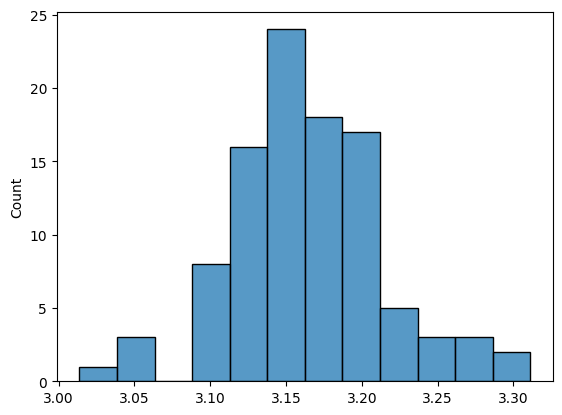

In [8]:
def get_rmse(df, y_input, x_input):
    y = y_input
    X = x_input

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    return mean_squared_error(y_test, y_pred, squared=False)

rmse = [get_rmse(c, c.pressure, c[['maximum_temprature', 'minimum_temprature', 'wind_speed']]) for i in range(100)]


sns.histplot(rmse)
plt.show()

d) Ajuste\
Usando a função anterior, teste diferentes combinações de variáveis no modelo para achar um que tenha uma boa performance.

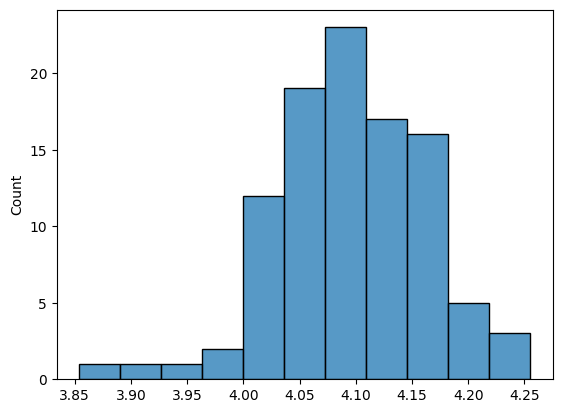

In [9]:
rmse_2 = [get_rmse(c, c.pressure, c[['humidity', 'amount_of_rain', 'wind_speed']]) for i in range(100)]

sns.histplot(rmse_2)
plt.show()

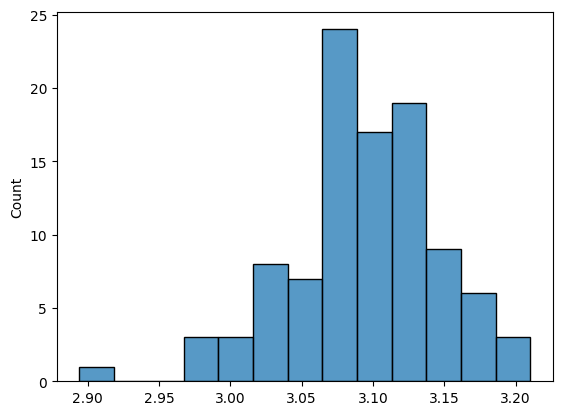

In [10]:
rmse_3 = [get_rmse(c, c.pressure, c[['humidity', 'minimum_temprature']]) for i in range(100)]

sns.histplot(rmse_3)
plt.show()

# 2) Regularização

a)
Usando a mesma base de dados, adapte seu workflow anterior para, em vez de usar regressão linear, estimar modelos LASSO e Ridge.

In [11]:
def get_rmse_lasso(df, x_input, y_input):
    y = x_input
    X = y_input

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    reg = Lasso().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    return mean_squared_error(y_test, y_pred, squared=False)

def get_rmse_ridge(df, x_input, y_input):
    y = x_input
    X = y_input

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    reg = Ridge().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    return mean_squared_error(y_test, y_pred, squared=False)

b) Funções
Crie uma função para estimar LASSO e Ridge e compare os resultados de 100 execuções.

In [12]:
rmse_lasso = [get_rmse_lasso(c, c.pressure, c[['humidity', 'minimum_temprature']]) for i in range(100)]
rmse_ridge = [get_rmse_ridge(c, c.pressure, c[['humidity', 'minimum_temprature']]) for i in range(100)]

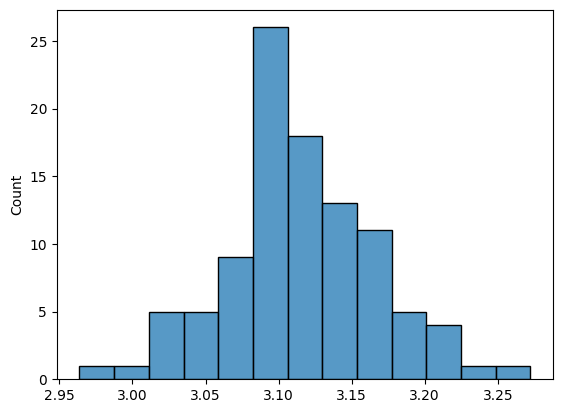

In [13]:
sns.histplot(rmse_lasso)
plt.show()

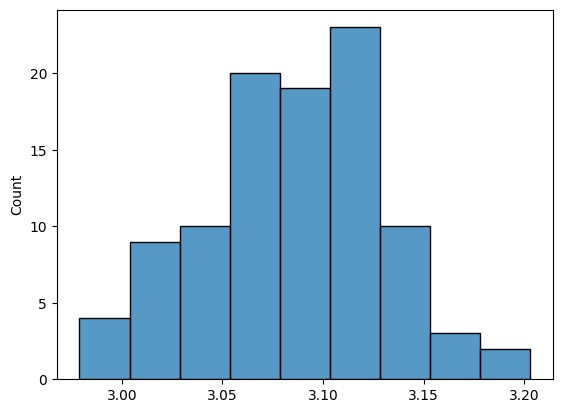

In [14]:
sns.histplot(rmse_ridge)
plt.show()

# 3) Regulação e transformação de preditores
Para este exercício, será necessário carregar os seguintes dados com resultados do segundo turno de 2018 por município no Brasil:

In [15]:
link = 'https://raw.githubusercontent.com/FLS-6497/datasets/main/aula4/eleicoes_mun_2018.csv'
elei18 = pd.read_csv(link, sep=';')

In [16]:
elei18[['pib_int', 'pib_dec']] = elei18.pib_total.str.split(',', expand=True)
elei18[['pib_int', 'pib_dec']] = elei18[['pib_int', 'pib_dec']].fillna(0)
cols = ['pib_int', 'pib_dec']
elei18['pib_total_adj'] = elei18[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)
elei18['pib_total_adj'] = elei18.pib_total_adj.astype(float).round(2)

a) Transformações básicas\
Crie uma nova variável que indique o percentual de votos válidos de Bolsonaro (dica: basta dividir votos_bolsonaro_2t_2018 por votos_validos_2t_2018)

In [17]:
elei18['pct_votos_validos_bolsonaro'] = elei18.votos_bolsonaro_2t_2018 / elei18.votos_validos_2t_2018

b) Exploração \
Crie alguns gráficos pra explorar a relação entre a votação de Bolsonaro e algumas das variáveis do banco (faça como quiser, e quantos gráficos quiser).

In [18]:
elei18['pib_pc'] = elei18.pib_total_adj / elei18.aptos_2018

In [19]:
elei18_adj = elei18[['regiao', 'pib_total_adj', 'aptos_2018', 'pct_votos_validos_bolsonaro', 'pib_pc']]

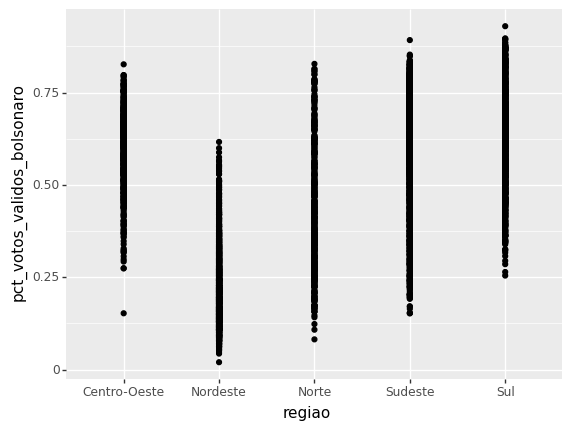

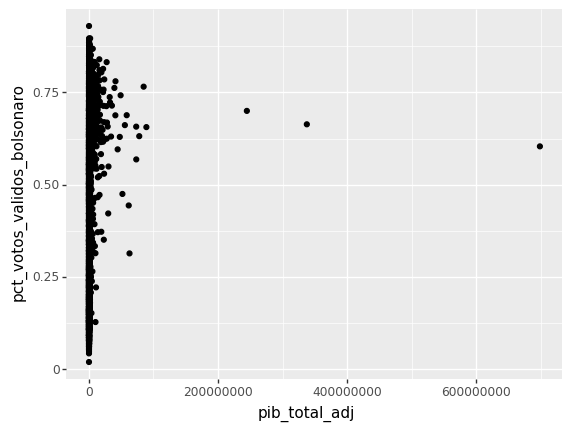

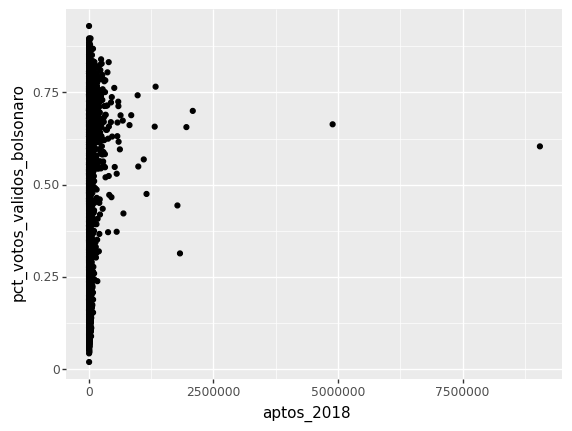

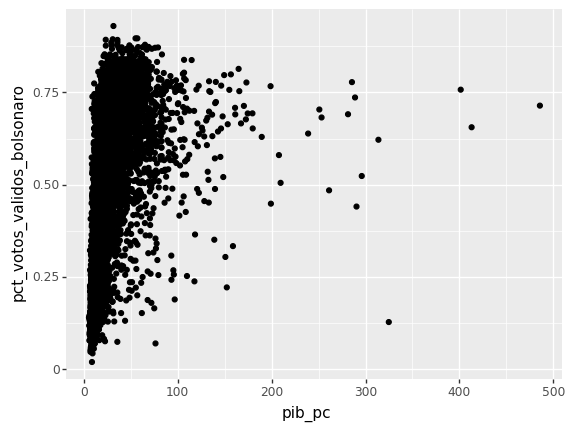

In [20]:
for column in elei18_adj.columns:
    if (column != 'pct_votos_validos_bolsonaro'):
        print(
            ggplot(elei18_adj, aes(column, elei18_adj.pct_votos_validos_bolsonaro)) 
            + geom_point()
            )

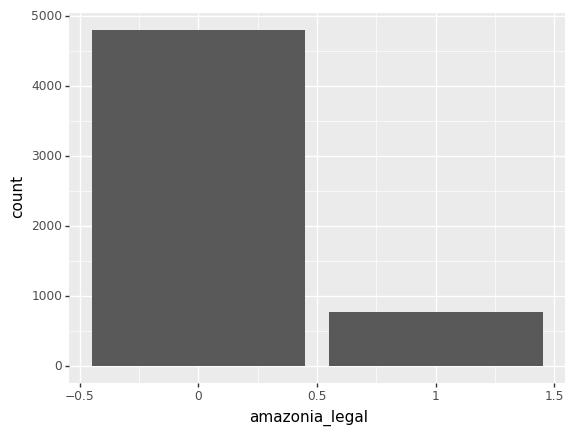

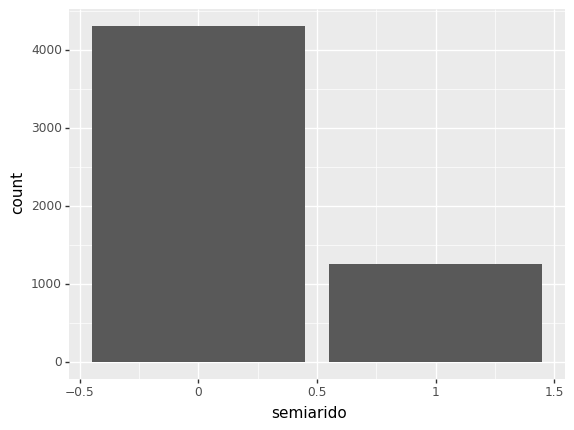

In [21]:
elei18_adj_2 = elei18[['amazonia_legal', 'semiarido']]

for column in elei18_adj_2.columns:
    if (column != 'pct_votos_validos_bolsonaro'):
        print(
            ggplot(elei18_adj_2, aes(column)) 
            + geom_bar()
            )

c) Modelos\
Rode modelos lineares, com e sem regularização, para tentar predizer a votação de Bolsonaro nos municípios usando variáveis como regiao, semiarido, capital, pib_total.

In [22]:
regiao_dummy = pd.get_dummies(elei18.regiao)
elei18 = elei18.join(regiao_dummy)

X = elei18[['semiarido', 'capital', 'pib_total_adj', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']]
y = elei18.pct_votos_validos_bolsonaro

AttributeError: 'list' object has no attribute 'hist'

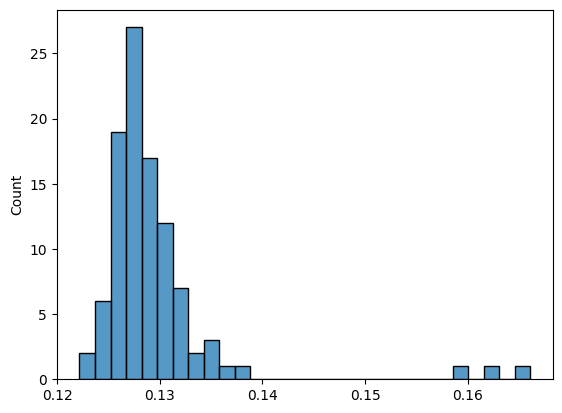

In [23]:
rmse = [get_rmse(elei18, elei18.pct_votos_validos_bolsonaro, elei18[['semiarido', 'capital', 'pib_total_adj', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']]) for i in range(100)]
sns.histplot(rmse)
plt.show()

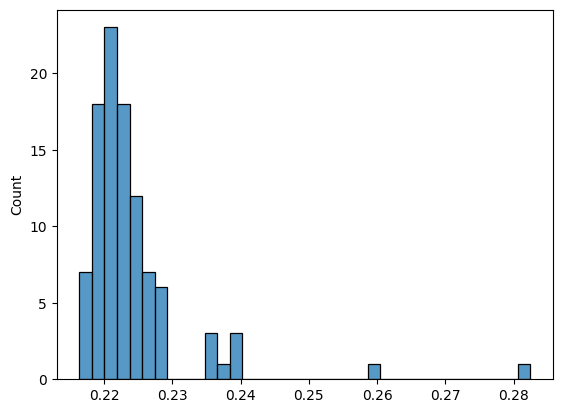

In [24]:
rmse_lasso = [get_rmse_lasso(elei18, elei18.pct_votos_validos_bolsonaro, elei18[['semiarido', 'capital', 'pib_total_adj', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']]) for i in range(100)]
sns.histplot(rmse_lasso)
plt.show()

c:\Users\ylucatelli\Documents\FLS-6497\FLS_6497\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.51307e-18): result may not be accurate.
c:\Users\ylucatelli\Documents\FLS-6497\FLS_6497\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.35738e-18): result may not be accurate.
c:\Users\ylucatelli\Documents\FLS-6497\FLS_6497\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.7677e-18): result may not be accurate.
c:\Users\ylucatelli\Documents\FLS-6497\FLS_6497\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.50274e-18): result may not be accurate.
c:\Users\ylucatelli\Documents\FLS-6497\FLS_6497\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.36188e-18): result may not be accurate.
c:\Users\ylucatelli\Docume

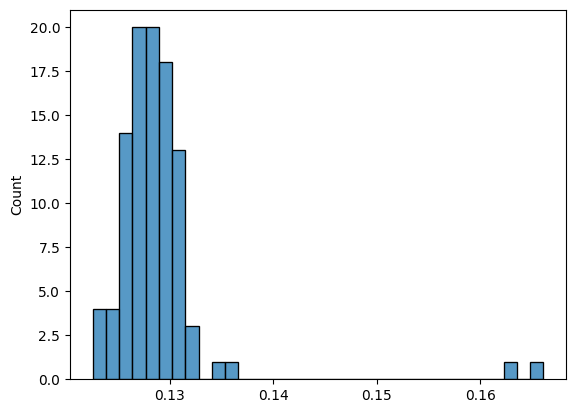

In [25]:
rmse_ridge = [get_rmse_ridge(elei18, elei18.pct_votos_validos_bolsonaro, elei18[['semiarido', 'capital', 'pib_total_adj', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']]) for i in range(100)]
sns.histplot(rmse_ridge)
plt.show()

d) Transformações\
Transforme a variável pib_total para que ela fique estandardizada (vale ser criativo e explorar outras variáveis do banco).

In [ ]:
elei18